In [1]:
import numpy as np
print(np.__version__)


1.26.4


In [5]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/8.9 MB 9.5 MB/s eta 0:00:01
   ---------------- ----------------------- 3.7/8.9 MB 12.1 MB/s eta 0:00:01
   ---------------------------- ----------- 6.3/8.9 MB 11.7 MB/s eta 0:00:01
   -------------------------------------- - 8.7/8.9 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 11.0 MB/s  0:00:00

   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1

In [2]:
!pip install scikit-surprise

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise import KNNBasic
from surprise.model_selection import train_test_split, cross_validate
from sklearn.metrics import  confusion_matrix, precision_score, recall_score,classification_report




In [7]:
ratings = pd.read_csv("ratings_small.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [8]:
ratings.shape

(100004, 4)

In [9]:
ratings = ratings.drop("timestamp", axis=1)

In [10]:
ratings.shape

(100004, 3)

In [11]:
ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [12]:
reader = Reader(rating_scale=(1,5))
ratings_new = Dataset.load_from_df(ratings,reader)

3c) Compute the average MAE and RMSE of the Probabilistic Matrix Factorization 
(PMF), User based Collaborative Filtering, Item based Collaborative Filtering, 
under the 5-folds cross-validation (10 points) 

In [72]:
model_pmf = SVD()
model_pmf_cv = cross_validate(model_pmf, ratings_new, measures=['RMSE','MAE'],cv=5,verbose=5)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8985  0.8968  0.9040  0.8949  0.8979  0.8984  0.0031  
MAE (testset)     0.6899  0.6912  0.6962  0.6933  0.6904  0.6922  0.0023  
Fit time          1.47    1.35    1.33    1.36    1.35    1.37    0.05    
Test time         0.19    0.19    0.20    0.21    0.19    0.20    0.01    


In [16]:
mean_rmse = np.mean(model_pmf_cv['test_rmse'])
mean_mae = np.mean(model_pmf_cv['test_mae'])

In [24]:
print(f"  Average RMSE for PMF over 5 folds = {mean_rmse:.4f}")
print(f"  Average MAE for PMF  over 5 folds = {mean_mae:.4f}")

  Average RMSE for PMF over 5 folds = 0.8977
  Average MAE for PMF  over 5 folds = 0.6904


In [19]:
sim_user = {
    "name":"cosine",
    "user_based": True
}

In [22]:
model_ucf = KNNBasic(sim_options=sim_user)
model_ucf_cv = cross_validate(model_ucf,ratings_new,measures=['RMSE','MAE'],cv=5,verbose=5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0019  0.9935  0.9961  1.0004  0.9848  0.9953  0.0061  
MAE (testset)     0.7735  0.7682  0.7695  0.7712  0.7627  0.7690  0.0036  
Fit time          0.37    0.48    0.42    0.41    0.45    0.43    0.04    
Test time         1.38    1.63    1.49    1.52    1.67    1.54    0.11    


In [25]:
mean_ucf_rmse = np.mean(model_ucf_cv['test_rmse'])
mean_ucf_mae = np.mean(model_ucf_cv['test_mae'])

In [26]:
print(f"  Average RMSE for UCF over 5 folds = {mean_ucf_rmse:.4f}")
print(f"  Average MAE for UCF  over 5 folds = {mean_ucf_mae:.4f}")

  Average RMSE for UCF over 5 folds = 0.9953
  Average MAE for UCF  over 5 folds = 0.7690


In [29]:
sim_item = {
    "name":"cosine",
    "user_based":False
}

In [30]:
model_item = KNNBasic(sim_options=sim_item)
model_item_cv = cross_validate(model_item,ratings_new,measures=['RMSE','MAE'],cv=5,verbose=5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9924  0.9919  0.9991  0.9852  1.0023  0.9942  0.0060  
MAE (testset)     0.7716  0.7719  0.7793  0.7676  0.7818  0.7744  0.0053  
Fit time          8.31    8.11    8.28    8.42    8.34    8.29    0.10    
Test time         6.06    6.39    6.35    6.35    6.21    6.27    0.12    


In [31]:
mean_icf_rmse = np.mean(model_item_cv['test_rmse'])
mean_icf_mae = np.mean(model_item_cv['test_mae'])

In [32]:
print(f"  Average RMSE for ICF over 5 folds = {mean_icf_rmse:.4f}")
print(f"  Average MAE for ICF  over 5 folds = {mean_icf_mae:.4f}")

  Average RMSE for ICF over 5 folds = 0.9942
  Average MAE for ICF  over 5 folds = 0.7744


3d: Compare the average (mean) performances of User-based collaborative filtering, 
item-based collaborative filtering, PMF with respect to RMSE and MAE.  Which 
ML model is the best in the movie rating data? (10 points) 

OBSERVATION:
PMF is the best-performing model for the ratings dataset, as it acheives the lowest RMSE and MAE. While user CF and item CF have similar performances, In RMSE, item-based slightly better than user based but negligible. But with MAE user-based performed better than item-based CF. but when compared to PMF both perform significantly less.

In [33]:
print("PMF:        RMSE =", mean_rmse,  " MAE =", mean_mae)
print("User-based: RMSE =", mean_ucf_rmse, " MAE =", mean_ucf_mae)
print("Item-based: RMSE =", mean_icf_rmse, " MAE =", mean_icf_mae)

PMF:        RMSE = 0.897713865000562  MAE = 0.6904067006628504
User-based: RMSE = 0.9953359467519244  MAE = 0.769037678887012
Item-based: RMSE = 0.9941964437285211  MAE = 0.7744153548900979


3e)Examine how the cosine, MSD (Mean Squared Difference), and Pearson 
similarities impact the performances of User based Collaborative Filtering and 
Item based Collaborative Filtering. Plot your results. Is the impact of the three 
metrics on User based Collaborative Filtering consistent with the impact of the 
three metrics on Item based Collaborative Filtering? (10 points) 

In [35]:
similarities = ["cosine", "msd", "pearson"]

In [43]:
UCF_results ={}
for sim in similarities:
    print(f"\n_________Similarity:{sim}_________")
    sim_user = {
        "name":sim,
        "user_based": True
    }
    
    model_ucf = KNNBasic(sim_options=sim_user)
    model_ucf_cv = cross_validate(model_ucf,ratings_new,measures=['RMSE','MAE'],cv=5,verbose=5)
    mean_ucf_rmse = np.mean(model_ucf_cv['test_rmse'])
    mean_ucf_mae = np.mean(model_ucf_cv['test_mae'])

    UCF_results[sim] = (mean_ucf_rmse,mean_ucf_mae)

    print(f"user-based CF -> RSME = {mean_ucf_rmse:.4f}, MAE = {mean_ucf_mae:.4f}")
    


_________Similarity:cosine_________
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9885  0.9966  0.9936  0.9927  0.9993  0.9942  0.0037  
MAE (testset)     0.7645  0.7698  0.7701  0.7670  0.7713  0.7685  0.0025  
Fit time          0.34    0.39    0.36    0.38    0.37    0.37    0.02    
Test time         1.46    1.37    1.40    1.36    1.33    1.38    0.04    
user-based CF -> RSME = 0.9942, MAE = 0.7685

_________Similarity:msd_________
Computing the msd similarity matrix...
Done computing similarity matri

In [44]:
ICF_results ={}
for sim in similarities:
    print(f"\n_________Similarity:{sim}_________")
    sim_user = {
        "name":sim,
        "user_based": False
    }
    
    model_icf = KNNBasic(sim_options=sim_user)
    model_icf_cv = cross_validate(model_icf,ratings_new,measures=['RMSE','MAE'],cv=5,verbose=5)
    mean_icf_rmse = np.mean(model_icf_cv['test_rmse'])
    mean_icf_mae = np.mean(model_icf_cv['test_mae'])

    ICF_results[sim] = (mean_icf_rmse,mean_icf_mae)

    print(f"item-based CF -> RSME = {mean_icf_rmse:.4f}, MAE = {mean_icf_mae:.4f}")
    


_________Similarity:cosine_________
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9912  0.9936  0.9907  0.9982  0.9958  0.9939  0.0028  
MAE (testset)     0.7728  0.7753  0.7708  0.7778  0.7731  0.7740  0.0024  
Fit time          8.06    7.44    8.48    8.21    8.41    8.12    0.37    
Test time         6.88    6.12    6.57    6.86    6.49    6.58    0.28    
item-based CF -> RSME = 0.9939, MAE = 0.7740

_________Similarity:msd_________
Computing the msd similarity matrix...
Done computing similarity matri

In [45]:
print("UCF_results:", UCF_results)
print("ICF_results:", ICF_results)


UCF_results: {'cosine': (0.9941542845444882, 0.7685496742763105), 'msd': (0.9669413035669623, 0.7437605018925076), 'pearson': (0.9973390915141348, 0.771798008106257)}
ICF_results: {'cosine': (0.9939170365678563, 0.7739811947916104), 'msd': (0.9347656649536169, 0.7208327768699853), 'pearson': (0.9896856091861, 0.7681788728576757)}


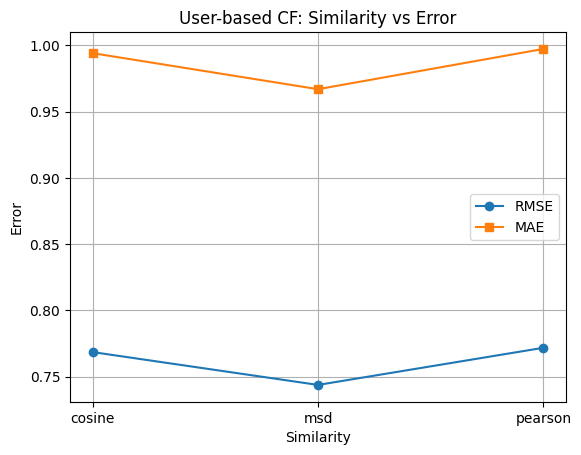

In [46]:
labels = ["cosine", "msd", "pearson"]

user_mae  = [UCF_results[s][0] for s in labels]
user_rmse = [UCF_results[s][1] for s in labels]

plt.figure()
plt.plot(labels, user_rmse, marker="o", label="RMSE")
plt.plot(labels, user_mae,  marker="s", label="MAE")
plt.title("User-based CF: Similarity vs Error")
plt.xlabel("Similarity")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()


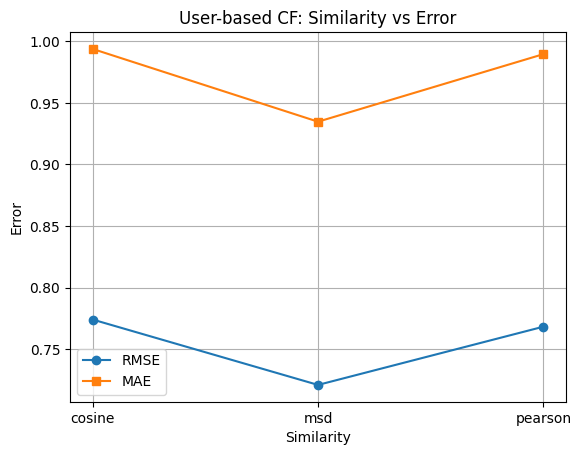

In [47]:
labels = ["cosine", "msd", "pearson"]

item_mae  = [ICF_results[s][0] for s in labels]
item_rmse = [ICF_results[s][1] for s in labels]

plt.figure()
plt.plot(labels, item_rmse, marker="o", label="RMSE")
plt.plot(labels, item_mae,  marker="s", label="MAE")
plt.title("User-based CF: Similarity vs Error")
plt.xlabel("Similarity")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()


OBSERVATION:

User based CF results:
     Cosine --> RMSE = 0.9942, MAE = 0.7685
     MSD -->    RMSE = 0.9669, MAE = 0.7438
     pearson -->RMSE = 0.9973, MAE = 0.7718

item based CF results:
     Cosine --> RMSE = 0.9939, MAE = 0.7740
     MSD -->    RMSE = 0.9348, MAE = 0.7208
     pearson -->RMSE = 0.9897, MAE = 0.7682

From the plots we can see that the impact of cosine,MSD and pearson similarities is consistent between the user-based Cf and item based CF in this experiment. In both cases MSD similarity is the best performing and the cosine and pearson perform worse then the MSD but almost comparable.

3f) Examine how the number of neighbors impacts the performances of User based 
Collaborative Filtering and Item based Collaborative Filtering? Plot your results.  
(10 points) 

In [65]:
k_values = np.arange(5,100,10)

In [66]:
UCF_k_mae = []
UCF_k_rmse = []

for K in k_values:
    print(f"\n==== User-based CF, K = {K} ====")
    
    sim_user = {
        "name": "cosine",
        "user_based": True
    }
    
    model_ucf = KNNBasic(k=K, sim_options=sim_user)
    
    cv_results = cross_validate(
        model_ucf,
        ratings_new,        
        measures=['RMSE', 'MAE'],
        cv=5,
        verbose=False
    )
    
    mean_rmse = np.mean(cv_results['test_rmse'])
    mean_mae  = np.mean(cv_results['test_mae'])
    
    UCF_k_rmse.append(mean_rmse)
    UCF_k_mae.append(mean_mae)
    
    print(f"RMSE = {mean_rmse:.4f}, MAE = {mean_mae:.4f}")



==== User-based CF, K = 5 ====
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE = 1.0424, MAE = 0.8047

==== User-based CF, K = 15 ====
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE = 1.0010, MAE = 0.7712

==== User-based CF, K = 25 ====
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing 

In [77]:
K_values = np.arange(5,130,10)

In [78]:
ICF_k_mae = []
ICF_k_rmse = []

for K in K_values:
    print(f"\n==== Item-based CF, K = {K} ====")
    
    sim_item = {
        "name": "cosine",
        "user_based": False
    }
    
    model_icf = KNNBasic(k=K, sim_options=sim_item)
    
    cv_results = cross_validate(
        model_icf,
        ratings_new,
        measures=['RMSE', 'MAE'],
        cv=5,
        verbose=False
    )
    
    mean_rmse = np.mean(cv_results['test_rmse'])
    mean_mae  = np.mean(cv_results['test_mae'])
    
    ICF_k_rmse.append(mean_rmse)
    ICF_k_mae.append(mean_mae)
    
    print(f"RMSE = {mean_rmse:.4f}, MAE = {mean_mae:.4f}")



==== Item-based CF, K = 5 ====
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE = 1.1017, MAE = 0.8594

==== Item-based CF, K = 15 ====
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE = 1.0307, MAE = 0.8054

==== Item-based CF, K = 25 ====
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing 

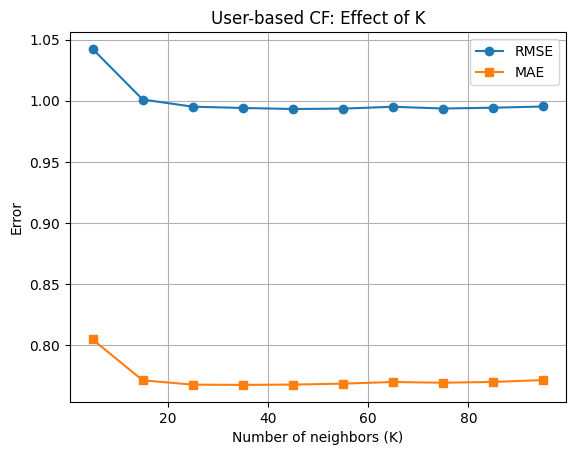

In [79]:
plt.figure()
plt.plot(k_values, UCF_k_rmse, marker='o', label='RMSE')
plt.plot(k_values, UCF_k_mae,  marker='s', label='MAE')
plt.title('User-based CF: Effect of K')
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

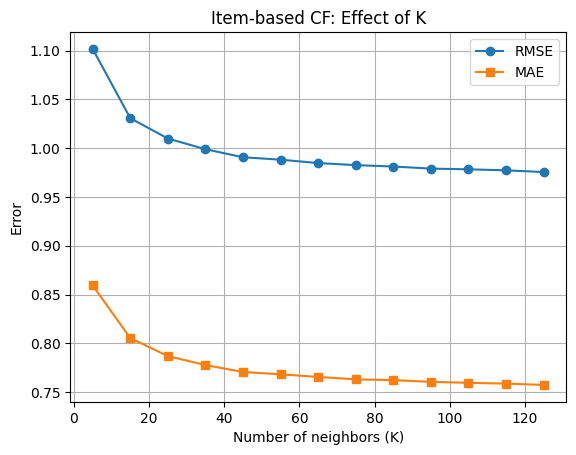

In [80]:
plt.figure()
plt.plot(K_values, ICF_k_rmse, marker='o', label='RMSE')
plt.plot(K_values, ICF_k_mae,  marker='s', label='MAE')
plt.title('Item-based CF: Effect of K')
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

The user-based and item based show similar kind of graphs for both RMSE and MAE but the user based is silightly performs better than item-based but the peroformace is almost comparable and the difference is only marginal. but with increase in K value the item based performs better than the user based as it keeps on decresing while the user based gets stagnated.

User based CF reaches optimal performance around moderate k(20-40) after which the performance mostly plateaus or slightly worsens.
Item based CF continues to gradually improve the over the whole tested K values with RMSE and MAE decreasing as K grows.

so the number of neighbors clearly impacts performance from the obeservations. you need enough neighbors to stabilize predictions, but for user base CF after a point that is too many neighbors can start introduce noise and thus decrease in performance, while item-based CF can safely exploit larger neighborhood.

3g) Identify the best number of neighbor (denoted by K) for User/Item based 
collaborative filtering in terms of RMSE.  Is the best K of User based collaborative 
filtering the same with the best K of Item based collaborative filtering? (10 points) 

In [82]:
best_k_user = k_values[np.argmin(UCF_k_rmse)]
best_rmse_user = float(np.min(UCF_k_rmse))

best_k_item = K_values[np.argmin(ICF_k_rmse)]
best_rmse_item = float(np.min(ICF_k_rmse))

print("Best K (User-based CF):", best_k_user, "with RMSE =", best_rmse_user)
print("Best K (Item-based CF):", best_k_item, "with RMSE =", best_rmse_item)

Best K (User-based CF): 45 with RMSE = 0.9932207934039745
Best K (Item-based CF): 125 with RMSE = 0.9755200156626014


Item based and User based collaborative filtering have different values for best K. This shows that the two might have different values for best K that is neighborhood sizes. The item based CF in my case is improving by increasing the K but the value is not decresing at as it decreased for the low K values. unlike user based where after K=45 it stagnated but gradually incresed the mean values. The item based too stagnates in the similar range but the values does decrese with increase in K and that is the reason for the high K value. 